IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#display all columns and rows of the dataframe
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 150)

LOADING THE DATA

In [2]:
from google.colab import files
raw=files.upload()

Saving titanic.csv to titanic.csv


REVIEWING THE DATASET

In [110]:
rdata=pd.read_csv('titanic.csv')

In [111]:
ndata=rdata.copy()
ndata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
df=ndata.copy()

In [113]:
print("Column Names:", df.columns)

Column Names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Survived ---> This is basically our target.(We've to train our model on the basis of this data.)

PClass ---> Ticket Class (1=Luxurious Class , 2=Modest Class, 3=Steerage Class(Basic))

Fare ---> Passenger fare

Cabin ---> Cabin Number

Emarked ---> From where the people started their voyage (C=Cherbourg, S= Southampton, Q=Queenstown)

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them


EXPLORATORY DATA ANALYSIS

In [114]:
df.shape

(891, 12)

In [115]:
df.head()# Display the first few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df.tail()# Display the last few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [117]:
# Display data types of columns in the DataFrame
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [118]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [119]:
# Display summary for categorical data
print(df.describe(include='object').T)

         count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      204    147                  B96 B98    4
Embarked   889      3                        S  644


# Analyze survival rates by different factors

VISUALIZATION

<Axes: >

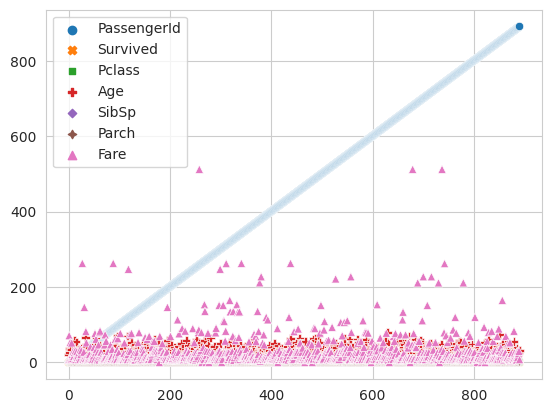

In [120]:
sb.scatterplot(rdata)

UNIVARIATE ANALYSIS

<Axes: xlabel='Pclass', ylabel='count'>

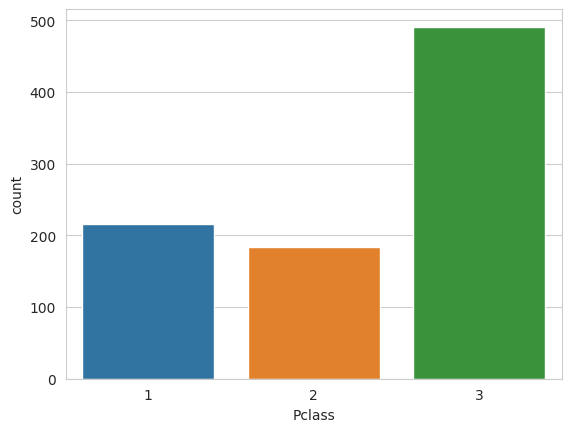

In [121]:
sb.countplot(x='Pclass', data=df)

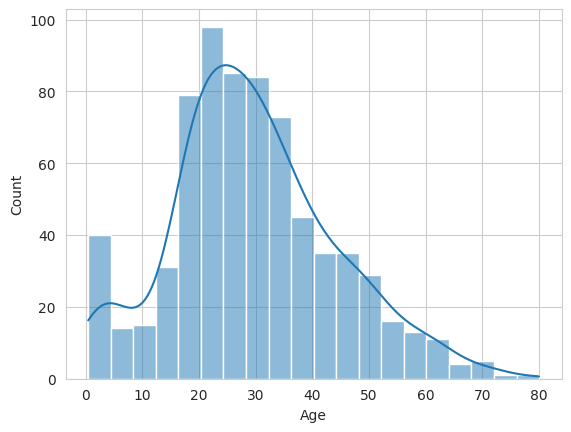

In [122]:
# Visualize distribution of a numerical column
sb.histplot(df['Age'], kde=True)
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


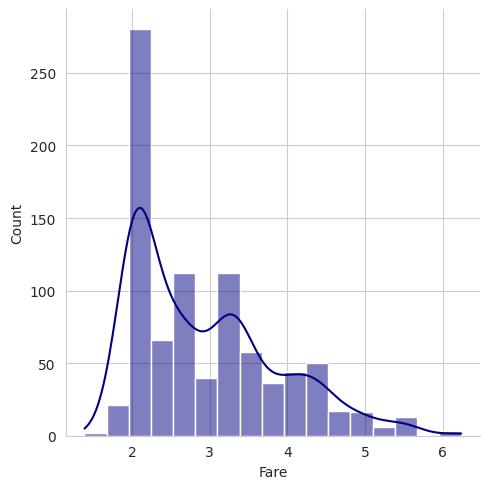

In [123]:
sb.displot(np.log(df['Fare']),kde=True, color='navy')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

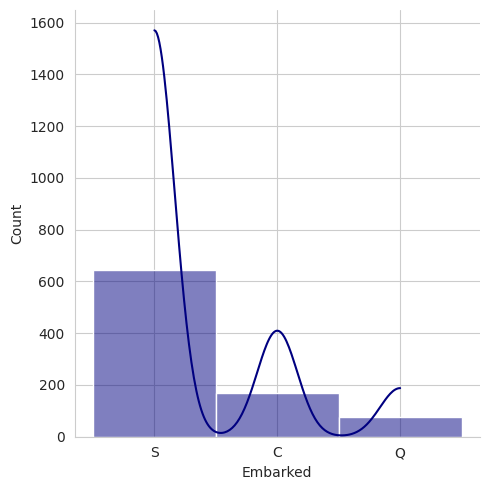

In [124]:
sb.displot(df['Embarked'], kde=True, color='navy')
plt.show

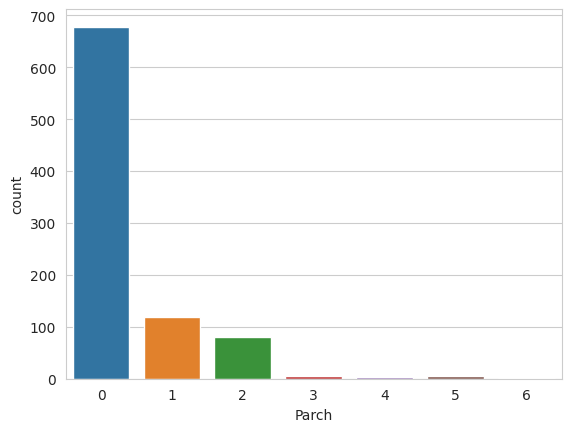

In [125]:
# Count plot for a categorical variable
sb.countplot(x='Parch', data=rdata)
plt.show()


BIVARAITE ANALYSIS

Selection of Relevant Data:

train[['Pclass', 'Survived']]: Choose only the 'Pclass' and 'Survived' columns from the 'train' DataFrame.
Grouping by Passenger Class:

groupby(['Pclass'], as_index=False): Group the selected data based on the 'Pclass' column. The as_index=False part ensures that 'Pclass' doesn't become the index of the resulting grouped data.
Calculating Average Survival Rate:

mean(): Calculate the mean (average) of the 'Survived' column for each group. This gives us the average survival rate for passengers in each passenger class.
Printing the Result:

print(average_survival_rate): Display the resulting DataFrame that shows the average survival rate for each passenger class.

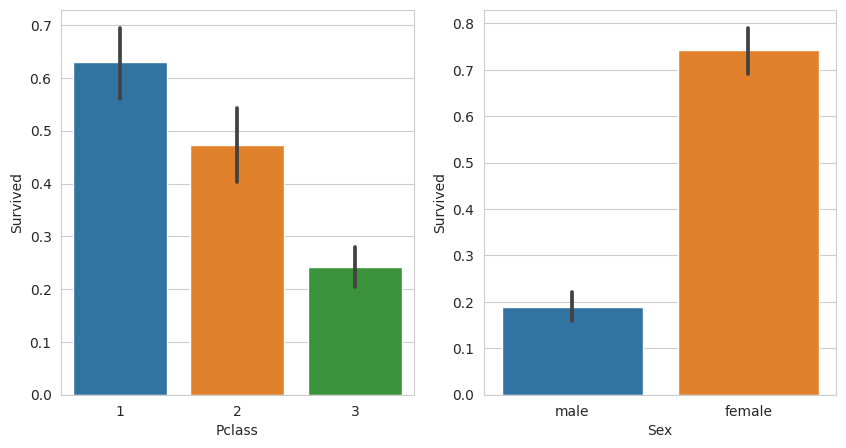

In [126]:
# Visualize survival rates
plt.figure(figsize=(10, 5))

# Bar plot for survival rates by Pclass
plt.subplot(1, 2, 1)
sb.barplot(x='Pclass', y='Survived', data=df)

# Bar plot for survival rates by Sex
plt.subplot(1, 2, 2)
sb.barplot(x='Sex', y='Survived', data=df)

plt.show()

In [127]:
# Select the 'Sex' and 'Survived' columns from the 'train' DataFrame
selected_data = df[['Sex', 'Survived']]

# Group the selected data by the 'Pclass' column
grouped_data = selected_data.groupby(['Sex'], as_index=False)

# Calculate the mean (average) of the 'Survived' column for each passenger class
average_survival_rate = grouped_data.mean()

# Print the result, showing the average survival rate for each passenger class
print(average_survival_rate)

 #on average,which gender had a higher survival rate
 #compared to those of male and female.
 #female survived more

      Sex  Survived
0  female  0.742038
1    male  0.188908


Relationship between age group and survived
Define Bins and Labels:

**bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]: Specifies the bin edges.**
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']: Assigns labels to the age groups.
Create 'age_group' Column:

***data['age_group'] = pd.cut(data['Age'], bins=bins, right=False, labels=labels, include_lowest=True)***: Creates a new column 'age_group' by cutting the 'Age' column into specified bins.
Calculate Survival Rate:

**survival_rate_by_age = data.groupby('age_group')['Survived'].mean():** Calculates the mean survival rate for each age group.
Prepare Data for Seaborn:

**survival_rate_by_age_group = survival_rate_by_age.reset_index(): **Resets the index to make 'age_group' a column, which is helpful for Seaborn plotting.
Plotting with Seaborn:

**sns.barplot(x='age_group', y='Survived', data=survival_rate_by_age_group, palette='husl'):** Plots a bar plot using Seaborn, showing the survival rate for each age group.
Add Labels and Title:

**plt.xlabel('Age Group'): **Adds a label to the x-axis.
plt.ylabel('Survival Rate (%)'): Adds a label to the y-axis.
plt.title('Survival Rate by Age Group'): Sets the title of the plot.
Rotate X Labels:

**plt.xticks(rotation=45)**: Rotates the x-axis labels for better readability.
Show the Plot:

**plt.show():** Displays the plot.
This code produces a bar plot showing the survival rate for different age groups, providing insights into how age correlates with survival in the dataset.

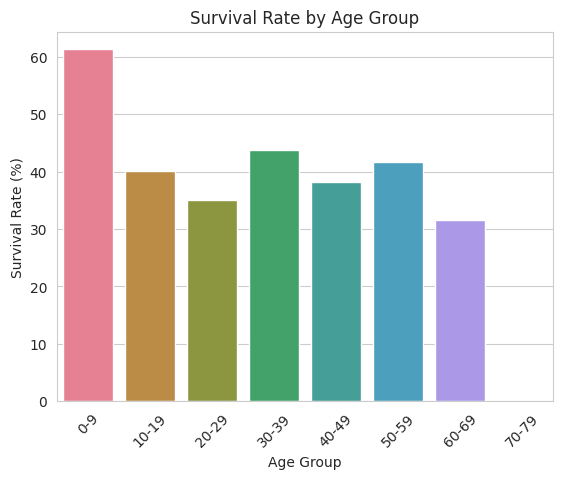

In [128]:
# Define bin edges and labels for age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create a new column 'age_group' by cutting the data into bins
df['age_group'] = pd.cut(df['Age'], bins=bins, right=False, labels=labels, include_lowest=True)

# Calculate the mean survival rate for each age group
survival_rate_by_age = df.groupby('age_group')['Survived'].mean()*100

# Reset index to make 'age_group' a column (helps with Seaborn plotting)
survival_rate_by_age_group = survival_rate_by_age.reset_index()

# Plotting with Seaborn
sb.barplot(x='age_group', y='Survived', data=survival_rate_by_age_group, palette='husl')

# Add labels and title to the plot
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group')

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Creates a new column 'Family' indicating whether a passenger had any family member aboard (1 if yes, 0 if no).

Drops the 'Parch' and 'SibSp' columns as they are no longer needed.

Plots two subplots:

The first subplot (axis1) is a count plot showing the distribution of passengers with and without family.

The second subplot (axis2) is a bar plot showing the average survival rate for passengers with and without family.

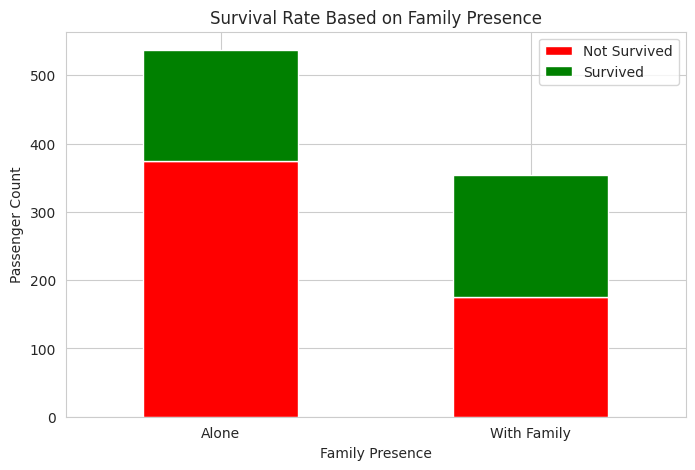

In [129]:
# Create a 'Family' column indicating whether a passenger had any family member aboard
ndata['Family'] = (ndata['Parch'] + ndata['SibSp'] > 0).astype(int)


# Drop 'Parch' and 'SibSp' columns
ndata = ndata.drop(['Parch', 'SibSp'], axis=1)


# Create a stacked bar plot
family_survived = ndata.groupby(['Family', 'Survived']).size().unstack()
family_survived.columns = ['Not Survived', 'Survived']

# Plotting
family_survived.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.xticks([0, 1], ["Alone", "With Family"], rotation=0)
plt.title("Survival Rate Based on Family Presence")
plt.xlabel("Family Presence")
plt.ylabel("Passenger Count")

plt.show()


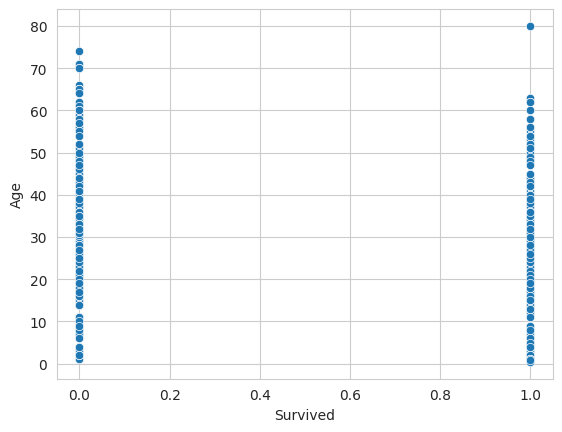

In [130]:
# Scatter plot
sb.scatterplot(x='Survived', y='Age', data=df)
plt.show()

RELATIONSHIP BETWEEN FARE AND SURVIVED***

<Axes: xlabel='Survived'>

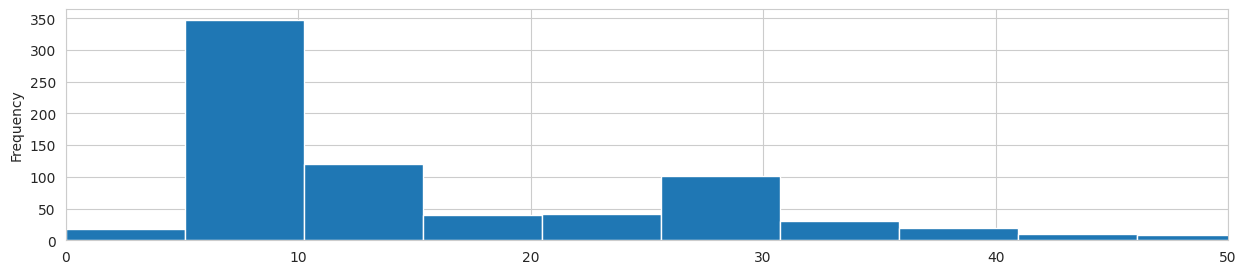

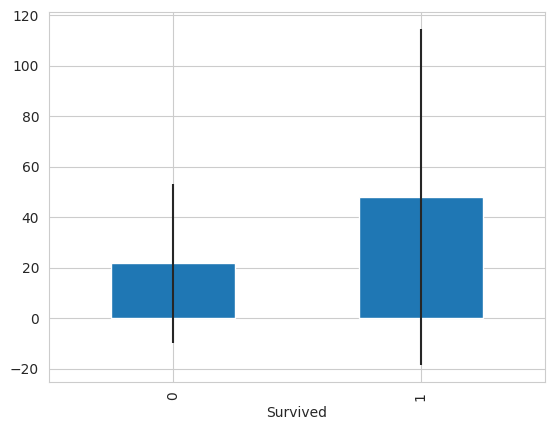

In [131]:

# Convert the 'Fare' column from float to integer for both DataFrames
df['Fare'] = df['Fare'].astype(int)

# Get the fare for survived and didn't survive passengers
fare_not_survived =df["Fare"][df["Survived"] == 0]
fare_survived = df["Fare"][df["Survived"] == 1]

# Calculate the average and standard deviation for fare of survived and not survived passengers
average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

# Plotting
df['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 50))

# Set names for index in average_fare and std_fare DataFrames
average_fare.index.names = std_fare.index.names = ["Survived"]

# Plot a bar plot of average fare with error bars representing standard deviation
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

In [132]:
df['Fare'].unique()

array([  7,  71,  53,   8,  51,  21,  11,  30,  16,  26,  31,  29,  13,
        18,  35, 263,  27, 146,  10,  82,  52,   9,  41,  15,  17,  39,
        76,  61,  46,  80,  83,  73,  14,  56,  12,  47,  34,  20,  63,
        23,  77,  24, 247,  22,   6,  79,  36,  66,  69,  55,  25,  33,
        28,   0,  50, 113,  90,  86, 512, 153, 135,  19,  78,  91, 151,
       110, 108, 262, 164, 134,  57, 133,  75, 211,   4, 227, 120,  32,
        81,  89,  38,  49,  59,  93, 221, 106,  40,  42,  65,  37,   5])

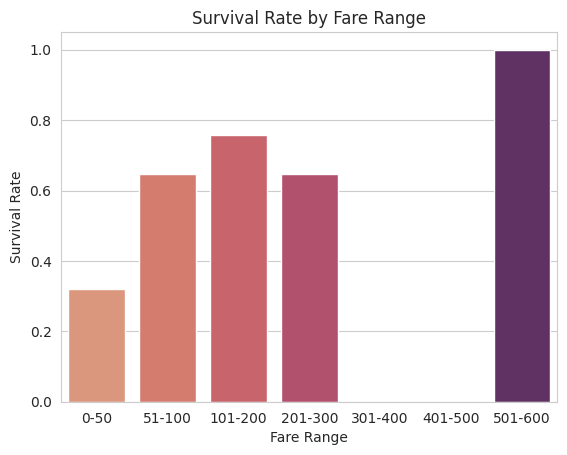

In [133]:
# Assuming 'data' is your DataFrame
# Define fare bins and labels
fare_bins = [0, 50, 100, 200, 300, 400, 500, 600]
fare_labels = ['0-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-600']

# Create a new column 'FareRange' based on fare bins
df['FareRange'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False, include_lowest=True)

# Calculate survival rate by fare range
survival_rate_by_fare = df.groupby('FareRange')['Survived'].mean().reset_index()

# Plotting
sb.barplot(data=survival_rate_by_fare, x='FareRange', y='Survived', palette='flare')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Range')
plt.show()

In [134]:
#display summary for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.500,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.00,0.000,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.000,3.0,3.0,3.0
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.000,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.000,0.0,0.0,6.0
Fare,891.0,31.785634,49.703730,0.00,7.000,14.0,31.0,512.0


DATACLEANING:

Detecting missing values

In [135]:
rdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_group      178
FareRange        0
dtype: int64

<Axes: >

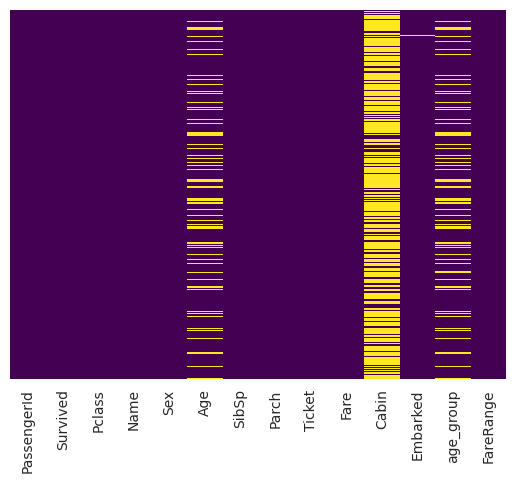

In [137]:
sb.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [138]:
(df.isna().sum()*100/df.shape[0]).sort_values(ascending=True)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
FareRange       0.000000
Embarked        0.224467
Age            19.865320
age_group      19.977553
Cabin          77.104377
dtype: float64

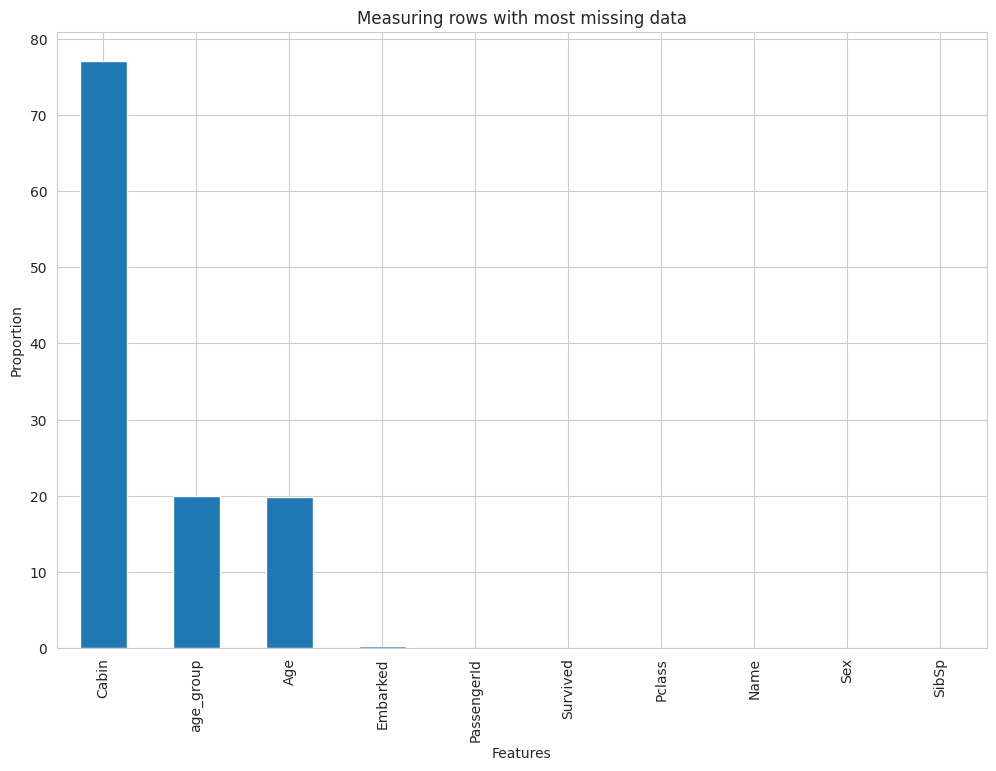

In [139]:
sb.set_style('whitegrid')
plt.figure(figsize=(12,8))
miss_values=df.isna().sum()*100/df.shape[0]
miss_values=miss_values.sort_values(ascending=False)[0:10]
ax=miss_values.plot(kind='bar')
ax.set_title('Measuring rows with most missing data')
ax.set_ylabel('Proportion')
ax.set_xlabel('Features')
ax.tick_params(axis='x',rotation=90)



In [140]:
df['Family']=df['SibSp']+df['Parch']+1

In [141]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,FareRange,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,20-29,0-50,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,30-39,51-100,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,20-29,0-50,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,30-39,51-100,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,30-39,0-50,1


In [142]:
df['Family']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family, Length: 891, dtype: int64

In [143]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_group      178
FareRange        0
Family           0
dtype: int64

HANDLING MISSING VALUES

General Recommendations:


Always understand the nature of missing values before deciding on a strategy.


Consider the impact of missing data on your analysis and results.


Document any imputation or handling strategy for transparency.

In [145]:
df=df.drop(['PassengerId','SibSp','Parch','age_group','FareRange','Cabin'],axis=1)

In [148]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    2
Family      0
dtype: int64

In [147]:
df['Age'].fillna(method='ffill',inplace=True)


In [153]:
df.dropna(subset=['Embarked'], inplace=True)

In [154]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    0
Family      0
dtype: int64

<ipython-input-155-c31ab5b310f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


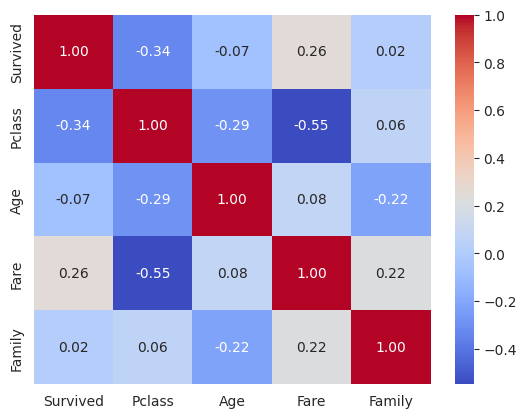

In [155]:
correlation=df.corr()
sb.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [156]:
print(correlation['Survived'].sort_values(ascending=False),'\n')

Survived    1.000000
Fare        0.255447
Family      0.018277
Age        -0.069907
Pclass     -0.335549
Name: Survived, dtype: float64 



*** Likelihood of surviving the Titanic disaster\***

 Age, passenger class, embarkation point, gender, family status, and fare are all considered when analyzing survival rates.


# OUTLIERS DETECTION AND REMOVAL

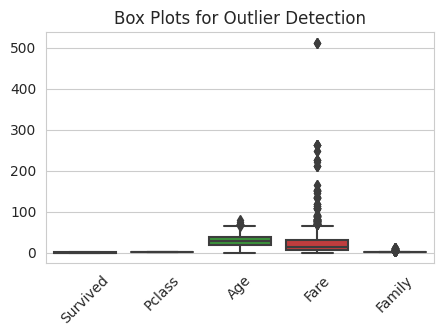

In [157]:
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for numerical columns
plt.figure(figsize=(5,3))
sb.boxplot(data=df[numerical_columns])
plt.title('Box Plots for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Create scatter plots for pairs of numerical columns
#plt.figure(figsize=(12, 8))
#sb.pairplot(df[numerical_columns])
#plt.suptitle('Pair Plots for Outlier Detection', y=1.02)
#plt.show()


In [158]:
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Set a multiplier for IQR (adjust as needed)
iqr_multiplier = 1.5

# Identify and remove outliers based on IQR
df_no_outliers_iqr = df[~((df < (Q1 - iqr_multiplier * IQR)) | (df > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

# Display before and after
print("Before IQR Removal:")
print(df.describe())

print("\nAfter IQR Removal:")
print(df_no_outliers_iqr.describe())


Before IQR Removal:
         Survived      Pclass         Age        Fare      Family
count  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.535624   31.677165    1.906637
std      0.486260    0.834700   14.527483   49.706915    1.614703
min      0.000000    1.000000    0.420000    0.000000    1.000000
25%      0.000000    2.000000   20.000000    7.000000    1.000000
50%      0.000000    3.000000   28.000000   14.000000    1.000000
75%      1.000000    3.000000   38.000000   31.000000    2.000000
max      1.000000    3.000000   80.000000  512.000000   11.000000

After IQR Removal:
         Survived      Pclass         Age        Fare      Family
count  699.000000  699.000000  699.000000  699.000000  699.000000
mean     0.344778    2.450644   29.711488   16.165951    1.404864
std      0.475636    0.752310   13.298548   13.394967    0.685945
min      0.000000    1.000000    0.420000    0.000000    1.000000
25%      0.000000    2.000000   21.0

<ipython-input-158-131499712e54>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-158-131499712e54>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-158-131499712e54>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers_iqr = df[~((df < (Q1 - iqr_multiplier * IQR)) | (df > (Q3 + iqr_multiplier * IQR))).any(axis=1)]


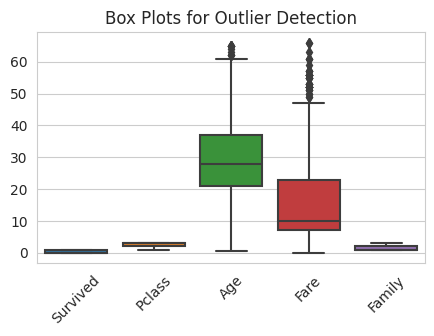

In [160]:
# Select numerical columns for outlier detection
numerical_columns = df_no_outliers_iqr.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for numerical columns
plt.figure(figsize=(5,3))
sb.boxplot(data=df_no_outliers_iqr[numerical_columns])
plt.title('Box Plots for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Create scatter plots for pairs of numerical columns
#plt.figure(figsize=(12, 8))
#sb.pairplot(df_no_outliers_iqr[numerical_columns])
#plt.suptitle('Pair Plots for Outlier Detection', y=1.02)
#plt.show()

In [161]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
Ticket       object
Fare          int64
Embarked     object
Family        int64
dtype: object

In [169]:
df.shape

(889, 9)

In [170]:
data=df_no_outliers_iqr.copy()

In [173]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    0
Family      0
dtype: int64

# ***Ordinal Encoding***

In [174]:
from sklearn.preprocessing import LabelEncoder
# Select categorical columns for label encoding
categorical_columns = data.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df_encoded = data.copy()
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))


#apply(lambda col: label_encoder.fit_transform(col)): This applies the label encoding transformation to each column in the selected set of categorical columns.
# Here's a breakdown of this part:

#lambda col: label_encoder.fit_transform(col): This lambda function takes each column (col)
#and applies the label encoding transformation using label_encoder.fit_transform. The fit_transform method fits the encoder to the unique values in the column and transforms those values into numeric labels.

#The result is a DataFrame with the same structure as the original df_encoded, but with the categorical columns replaced by their corresponding label-encoded versions.

In [175]:
df_encoded.dtypes

Survived      int64
Pclass        int64
Name          int64
Sex           int64
Age         float64
Ticket        int64
Fare          int64
Embarked      int64
Family        int64
dtype: object

In [176]:
df_encoded.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    0
Family      0
dtype: int64

In [177]:
df_encoded.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,0,3,72,1,22.0,480,7,2,2
2,1,3,263,0,26.0,598,7,2,1
3,1,1,202,0,35.0,42,53,2,2
4,0,3,14,1,35.0,431,8,2,1
5,0,3,431,1,35.0,246,8,1,1


# *Splitting of X and Y*

In [182]:
X = df_encoded.drop('Survived', axis=1)

y=df_encoded['Survived']

DATA PARTITIONING:

The dataset will be divided into 80% for training and 20% for testing.


In [183]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [186]:
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
# standard scale data
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test)

In [195]:
# tested MinMaxScaler as KNN historically does better with MinMax
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the dat
mm = MinMaxScaler()
X_train_mm = ss.fit_transform(x_train)
X_test_mm = ss.transform(x_test)

***MODEL BUILDING***

Logistic regression

It is a popular supervised machine learning algorithm used for predicting categorical outcomes based on a set of independent variables.

It's mainly used for classification tasks, where the dependent variable is binary (e.g., 0 or 1, Yes or No), and it provides probabilistic values between 0 and 1 as predictions.

Unlike linear regression, which is used for regression problems, logistic regression employs an "S"-shaped logistic function to model the probability of an observation belonging to a particular class.

This algorithm is valuable because it can provide probability estimates and effectively classify new data using both continuous and discrete datasets.

It's widely used in various fields, including healthcare for diagnosing diseases, marketing for customer segmentation, and more.





In [188]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [189]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [190]:
  # Assuming your model is already trained
y_pred = classifier.predict(X_test)

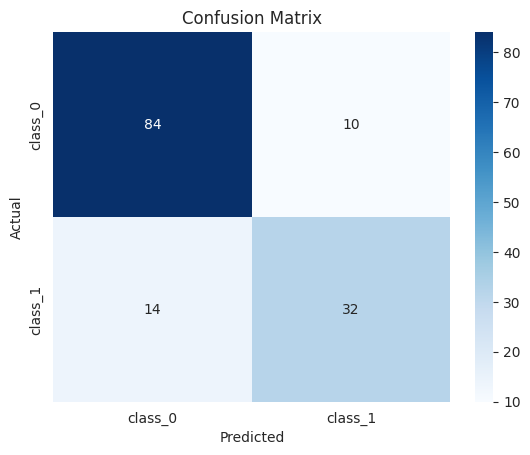

In [191]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [192]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        94
           1       0.76      0.70      0.73        46

    accuracy                           0.83       140
   macro avg       0.81      0.79      0.80       140
weighted avg       0.83      0.83      0.83       140



In [193]:
# Print accuracy
lr_acs = accuracy_score(y_test, y_pred)*100
print("\nAccuracy:", lr_acs)



Accuracy: 82.85714285714286


# ***KNN***

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.


K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.


K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.


It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.


KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset.

STEPS:

        Select the number K of the neighbors

        Calculate the Euclidean distance of K number of neighbors

        Take the K nearest neighbors as per the calculated Euclidean distance

        Among these k neighbors, count the number of the data points in each category

        Assign the new data points to that category for which the number of the neighbor is maximum

        Our model is ready




In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, p=2)
knn.fit(X_train_mm,y_train)


KNeighborsClassifier()

In [197]:
  # Assuming your model is already trained
y_pred_knn = knn.predict(X_test_mm)

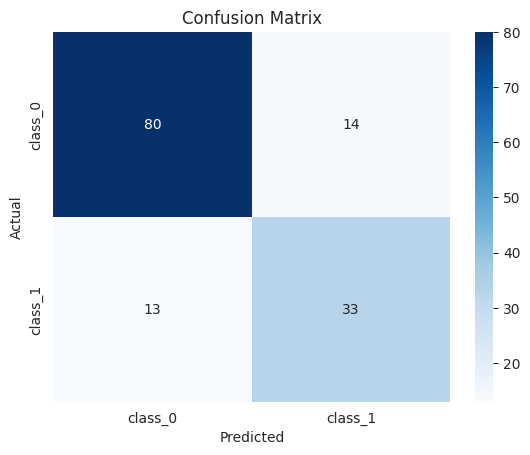

In [198]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [199]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        94
           1       0.70      0.72      0.71        46

    accuracy                           0.81       140
   macro avg       0.78      0.78      0.78       140
weighted avg       0.81      0.81      0.81       140



In [200]:
# Print accuracy
knn_acs = accuracy_score(y_test, y_pred_knn)*100
print("\nAccuracy:", knn_acs)



Accuracy: 80.71428571428572


# ***SVM***

Support Vector Machine (SVM)

It is a popular supervised learning algorithm primarily used for classification tasks, although it can be applied to regression problems as well.

Its main objective is to find the optimal hyperplane that separates data in an n-dimensional space into distinct classes.

This hyperplane is designed to best classify new data points in the future. SVM identifies the most critical data points, known as support vectors, to determine this hyperplane, which is why it's called a Support Vector Machine.

In [201]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [202]:
  # Assuming your model is already trained
y_pred_svc = svc.predict(X_test)

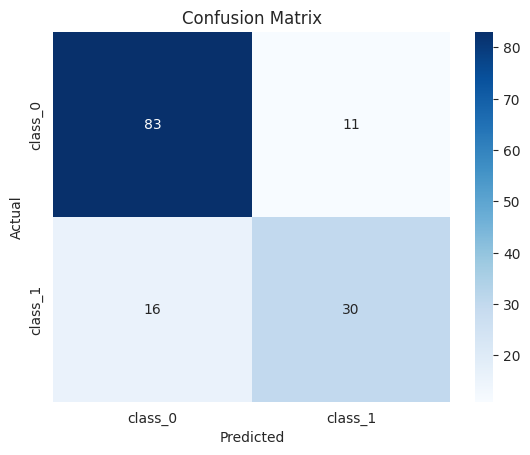

In [203]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [204]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        94
           1       0.73      0.65      0.69        46

    accuracy                           0.81       140
   macro avg       0.79      0.77      0.77       140
weighted avg       0.80      0.81      0.80       140



In [205]:
# Print accuracy
svc_acs = accuracy_score(y_test, y_pred_knn)*100
print("\nAccuracy:", svc_acs)



Accuracy: 80.71428571428572


# ***NAIVE BAYES CLASSIFICATION***

Naïve Bayes classification

It is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes theorem in the classifier's decision rule. Naïve Bayes classifier applies the Bayes theorem in practice. This classifier brings the power of Bayes theorem to machine learning.

2. Naive Bayes algorithm intuition


Naïve Bayes Classifier uses the Bayes theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

3. Types of Naive Bayes algorithm

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

Gaussian Naïve Bayes algorithm

When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class.


Multinomial Naïve Bayes algorithm

With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn)  Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

Bernoulli Naïve Bayes algorithm

In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.

Applications


Spam filtering

Text classification


Sentiment analysis

Recommender systems

It uses Bayes theorem of probability for prediction of unknown class

In [206]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [207]:
  # Assuming your model is already trained
y_pred_gnb = gnb.predict(X_test)

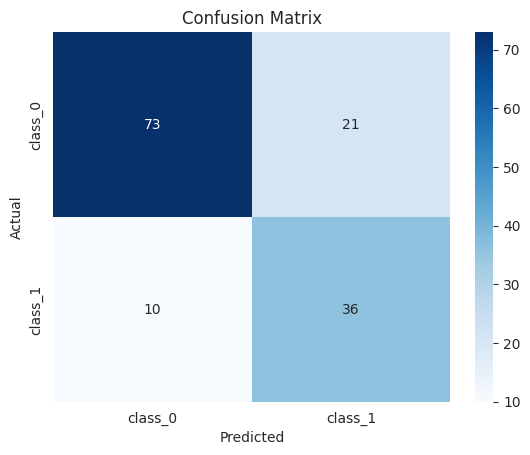

In [208]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [209]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        94
           1       0.63      0.78      0.70        46

    accuracy                           0.78       140
   macro avg       0.76      0.78      0.76       140
weighted avg       0.80      0.78      0.78       140



In [210]:
# Print accuracy
gnb_acs = accuracy_score(y_test, y_pred_gnb)*100
print("\nAccuracy:", gnb_acs)



Accuracy: 77.85714285714286


In [211]:
gnb.score(X_test,y_test)

0.7785714285714286

In [212]:
gnb.score(X_train,y_train)

0.7889087656529516

DECISION TREE CLASSIFIER

In [213]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
DecisionTreeClassifier()


DecisionTreeClassifier()

In [214]:
y_pred_dtc = dtc.predict(X_test)

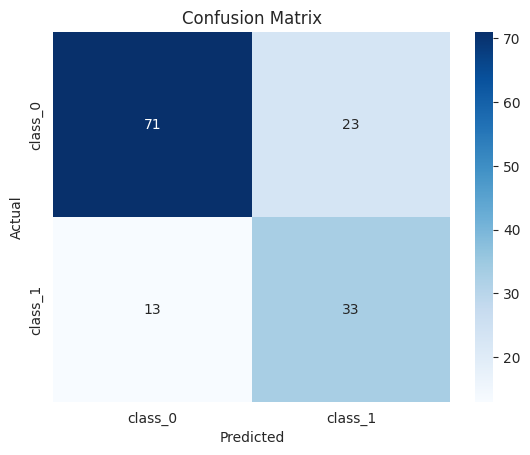

In [215]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtc)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [216]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtc))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        94
           1       0.59      0.72      0.65        46

    accuracy                           0.74       140
   macro avg       0.72      0.74      0.72       140
weighted avg       0.76      0.74      0.75       140



In [217]:
# Print accuracy
dtc_acs = accuracy_score(y_test, y_pred_dtc)*100
print("\nAccuracy:", dtc_acs)


Accuracy: 74.28571428571429


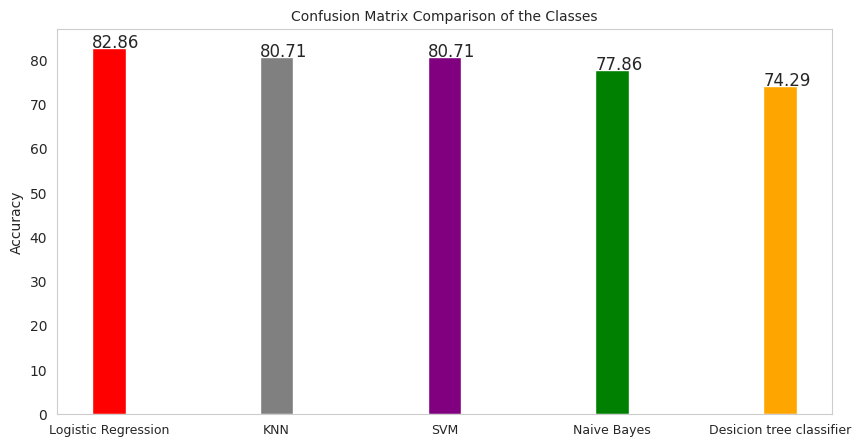

In [218]:
class_name = ("Logistic Regression", "KNN", "SVM", "Naive Bayes",'Desicion tree classifier')
class_score = (lr_acs,knn_acs,svc_acs,gnb_acs,dtc_acs)

y_pos = np.arange(len(class_score))
colors = ("red", "gray", "purple", "green", "orange","blue")

plt.figure(figsize=(10, 5))

# Adjust the width parameter to decrease the bar size
bar_width = 0.2  # You can adjust this value as needed
bar_positions = y_pos - bar_width / 2
bars = plt.bar(y_pos, class_score, color=colors, width=bar_width)

# Adding annotations to the bars
for bar, score in zip(bars, class_score):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f"{score:.2f}", fontsize=12)

plt.xticks(y_pos, class_name, fontsize=9)
plt.ylabel('Accuracy')
plt.grid()
plt.title("Confusion Matrix Comparison of the Classes", fontsize=10)
plt.show()